# Question 1: Bellman Policy Equations

Given deterministic policy $\pi_D: \mathcal{S} \to \mathcal{A}$

- $V^{\pi_D} \sim Q^{\pi_D}$:

$V^{\pi_D}(s) = Q^{\pi_D} (s,\pi_D(s))$  for all $s \in \mathcal{S}$.

- $Q^{\pi_D} \sim V^{\pi_D}$:

$Q^{\pi_D}(s, a) = \mathcal{R}(s,a) +\gamma \cdot \sum_{s' \in N} \mathcal{P} (s,a,s') \cdot V^{\pi_D}(s')$ for all $s \in \mathcal{S}$ and $a \in \mathcal{A}$. 



- $V^{\pi_D} \sim V^{\pi_D}$:

$V^{\pi_D}(s)= \mathcal{R}(s,\pi_D(s)) +\gamma \cdot \sum_{s' \in \mathcal{N}}\mathcal{P}(s,a,s')\cdot V^{\pi_D} (s')$ for all $s \in \mathcal{S}$.


- $Q^{\pi_D} \sim Q^{\pi_D}$:

$Q^{\pi_D}(s, a) = \mathcal{R}(s,a) +\gamma \cdot \sum_{s' \in N} \mathcal{P} (s,a,s')  Q^{\pi_D} (s', \pi_D(s'))$ for all $s \in \mathcal{S}$ and $a \in \mathcal{A}$. 



# Question 2: MDP with inifinte states.


Problem Setup:

- transition probabilities: $\mathbb{P} [s+1|s,a] = a, ~ \mathbb{P} [s|s,a] = 1-a$, for all $s\in \mathcal{S}$ for all $a\in [0,1]$. $\gamma = 0.5$.
- rewards: $s \to s+1: 1-a; ~ s \to s: 1+a$

Tasks:
- Calculate Optimal Value Function $V^\star(s)$ for all $s\in\mathcal{S}$ using MDP Bellman Optimality Eq.
- Calculate an optimal deterministiic policy $\pi^\star(s)$ for all $s\in \mathcal{S}$.

Reward function:

$$\begin{aligned}
 \mathbb{P} [s+1|s,a] = a, ~ \mathbb{P} [s|s,a] = 1-a,\\
  \mathcal{R}_T (s,a, s+1) = 1-a, ~  \mathcal{R}_T (s,a, s) = 1+a\\
\end{aligned}$$

$$\begin{aligned}
\mathcal{R}(s,a) &= \mathbb{E} [R_{t+1} |S_t =s, A_t=a] \\
 &= \sum_{s'\in S} \mathcal{P}(s,a,s')\cdot \mathcal{R}_T(s,a,s')\\
 &=a\times(1-a) + (1-a)(1+a)\\
 &=1+a-2a^2
\end{aligned}$$

$\begin{aligned}
V^\star(s) &= max_{a\in \mathcal{A}} \{\mathcal{R}(s,a) +\gamma \cdot \sum_{s' \in \mathcal{N}} \mathcal{P}(s,a,s')\cdot V^\star(s')\}\\
&= max_{a\in[0,1]} \{1+a-2a^2 + \gamma (a\times V^\star(s)+(1-a) \times V^\star(s)\}\\
&= max_{a\in[0,1]} \{1+a-2a^2 + \gamma  V^\star(s)\}\\
(1-\gamma)V^\star(s)  &= max_{a\in[0,1]} \{1+a-2a^2\}\\
max_{a\in[0,1]} \{1+a-2a^2\} & = 1.125 ~ \text{when} ~ 1-4a=0 \\
V^\star(s)  &= \frac{max_{a\in[0,1]} \{1+a-2a^2\}}{1-\gamma)} = \frac{1.125}{0.5}=2.25\\
\end{aligned}$

Therefore, the optimal value function is $V^\star(s)=2.25$, optimal policy is $\pi^\star(s) = 0.25$.


# Question 3: Lilypads

## Part 1: Mathematical Expressions

- State Space: $\mathcal{S} = \{i|0 \leq i \leq n\}$ (i is the numbering of the lilypads). $\mathcal{T} = \{i|i=0, i=n\}$
- Action Space: $\mathcal{A} = \{A, B\}$
- State transitions function

$\begin{equation}
  Pr[i'|(i,A)] ~ \text{for} ~ 1\leq i \leq n-1  =
    \begin{cases}
      \frac{i}{n} & \text{for} ~ i'=i-1\\
      \frac{n-i}{n}& \text{for} ~ i'=i+1\\
      0 & \text{otherwise}
    \end{cases}       
\end{equation}$

$\begin{equation}
  Pr[i'|(i,B)] ~ \text{for} ~ 1\leq i \leq n-1  =
    \begin{cases}
      \frac{1}{n} & \text{for all } ~ 0 \leq i' \leq n ~\text{and}~ i' \neq i\\
      0 & \text{otherwise}
    \end{cases}       
\end{equation}$

- Rewards function $R(i,a,i')$

$R(i,a,i') ~ \text{for} ~ 1\leq i \leq n-1, a \in \{A,B\} = 
    \begin{cases}
      1 ~\text{for}~ i' \neq n\\
      0 & \text{otherwise}
    \end{cases}   
$

## Part 2A: Code MDP (FiniteMarkovDecisionProcess )

In [15]:
from dataclasses import dataclass
from typing import Tuple, Dict
from rl.markov_decision_process import FiniteMarkovDecisionProcess
from rl.markov_decision_process import FinitePolicy, StateActionMapping
from rl.markov_process import FiniteMarkovProcess, FiniteMarkovRewardProcess
from rl.distribution import Categorical, Constant
from scipy.stats import poisson

In [18]:
[i for i in range(1,9)]

[1, 2, 3, 4, 5, 6, 7, 8]

In [60]:
@dataclass(frozen=True)
class LilypadState:
    lilypad: int
        
LilypadSoundMapping = StateActionMapping[LilypadState, str]

class FrogEscapeMDP(FiniteMarkovDecisionProcess[LilypadState, str]):
    
    def __init__(self, num_lilypads:int):
        self.num_lilypads = num_lilypads 
        super().__init__(self.get_action_transition_reward_map())

    def get_action_transition_reward_map(self) -> LilypadSoundMapping:
        d: Dict[LilypadState, Dict[str, Categorical[Tuple[LilypadState,float]]]] = {}
            
        d[0] = None
        d[self.num_lilypads] = None
        
        for lilypad in range(1,self.num_lilypads):
            state: LilypadState = LilypadState(lilypad)
            d1: Dict[str,Categorical[Tuple[LilypadState, float]]] = {}

            # sound A
            sr_probs_dict_a: Dict[Tuple[LilypadState, float], float] = {}
            sr_probs_dict_a[(LilypadState(lilypad - 1), 0)] = lilypad / (self.num_lilypads)
            if lilypad + 1 == self.num_lilypads:
                sr_probs_dict_a[(LilypadState(lilypad + 1), 1)] = 1 - lilypad/(self.num_lilypads)
            else:
                sr_probs_dict_a[(LilypadState(lilypad + 1), 0)] = 1 - lilypad /(self.num_lilypads)
            d1['A'] = Categorical(sr_probs_dict_a)

            # sound B
            sr_probs_dict_b: Dict[Tuple[LilypadState, float], float] = {}
            for i in range(self.num_lilypads+1):
                if i != lilypad:
                    if i == self.num_lilypads :
                        sr_probs_dict_b[(LilypadState(i), 1)] = 1/(self.num_lilypads)
                    else:
                        sr_probs_dict_b[(LilypadState(i), 0)] = 1 /(self.num_lilypads)
            d1['B'] = Categorical(sr_probs_dict_b)

            d[state] = d1
        return d


In [79]:
padnum

NameError: name 'padnum' is not defined

In [72]:
if __name__ == '__main__':
    from pprint import pprint

    number_of_lilypads: int = 10
    frog_mdp: FrogEscapeMDP = FrogEscapeMDP(number_of_lilypads)
    policies = list(itertools.product(['A', 'B'], repeat=number_of_lilypads)) 
    for policy in policies:
        print("NEW POLICY")
        print("----------------------------")
        fdp: FinitePolicy[LilypadState, int] = FinitePolicy(
            {LilypadState(padnum):
            Constant(policy[padnum - 1]) for padnum in range(1, number_of_lilypads)}
        )

        print("Policy Map")
        print("----------")
        print(fdp)

        implied_mrp: FiniteMarkovRewardProcess[LilypadState] =\
            frog_mdp.apply_finite_policy(fdp)

        #print(implied_mrp.get_value_function_vec(gamma=user_gamma))
        print("Implied MRP Policy Evaluation Value Function")
        print("--------------")
        pprint(evaluate_mrp_result(implied_mrp, gamma=1))
        print()


NEW POLICY
----------------------------
Policy Map
----------
For State LilypadState(lilypad=1):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=2):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=3):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=4):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=5):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=6):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=7):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=8):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=9):
  Do Action A with Probability 1.000

Implied MRP Policy Evaluation Value Function
--------------
{LilypadState(lilypad=5): 0.4971047974969224,
 LilypadState(lilypad=7): 0.5056913801073095,
 LilypadState(lilypad=6): 0.500529455031169,
 LilypadState(lilypad=1): 0.4289759833866106,
 LilypadState(lilypad=3): 0.4885680924360766,


{LilypadState(lilypad=5): 0.4513812045757779,
 LilypadState(lilypad=7): 0.4592517327216161,
 LilypadState(lilypad=6): 0.4545208448671175,
 LilypadState(lilypad=1): 0.38948295431083557,
 LilypadState(lilypad=3): 0.44360284598160793,
 LilypadState(lilypad=4): 0.44826015035082933,
 LilypadState(lilypad=8): 0.4592517327216161,
 LilypadState(lilypad=9): 0.5133200291983406,
 LilypadState(lilypad=2): 0.4327689355485468}

NEW POLICY
----------------------------
Policy Map
----------
For State LilypadState(lilypad=1):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=2):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=3):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=4):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=5):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=6):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=7):
  Do Action B with Probability 1.000
For State Lilypa

{LilypadState(lilypad=5): 0.4676996027838291,
 LilypadState(lilypad=7): 0.47094717552999865,
 LilypadState(lilypad=6): 0.47094717552999865,
 LilypadState(lilypad=1): 0.4035679872701595,
 LilypadState(lilypad=3): 0.45964398026231246,
 LilypadState(lilypad=4): 0.4644683421438065,
 LilypadState(lilypad=8): 0.47094717552999865,
 LilypadState(lilypad=9): 0.5238461620751304,
 LilypadState(lilypad=2): 0.4484189938544858}

NEW POLICY
----------------------------
Policy Map
----------
For State LilypadState(lilypad=1):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=2):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=3):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=4):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=5):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=6):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=7):
  Do Action B with Probability 1.000
For State Lilyp

 LilypadState(lilypad=7): 0.47768851468320406,
 LilypadState(lilypad=6): 0.47769180714618376,
 LilypadState(lilypad=1): 0.4122073054076527,
 LilypadState(lilypad=3): 0.46948273298750787,
 LilypadState(lilypad=4): 0.47440896279559713,
 LilypadState(lilypad=8): 0.477706588987605,
 LilypadState(lilypad=9): 0.5299294982102674,
 LilypadState(lilypad=2): 0.45801814873546265}

NEW POLICY
----------------------------
Policy Map
----------
For State LilypadState(lilypad=1):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=2):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=3):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=4):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=5):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=6):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=7):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=8):
  Do Action B with Probabi

{LilypadState(lilypad=5): 0.4539880245441892,
 LilypadState(lilypad=7): 0.45397476192859487,
 LilypadState(lilypad=6): 0.4539880245441892,
 LilypadState(lilypad=1): 0.3917361340495994,
 LilypadState(lilypad=3): 0.4461690192767792,
 LilypadState(lilypad=4): 0.45085209043188257,
 LilypadState(lilypad=8): 0.45396944637944153,
 LilypadState(lilypad=9): 0.4539880245441892,
 LilypadState(lilypad=2): 0.4352726770735218}

NEW POLICY
----------------------------
Policy Map
----------
For State LilypadState(lilypad=1):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=2):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=3):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=4):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=5):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=6):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=7):
  Do Action A with Probability 1.000
For State Lilypa

{LilypadState(lilypad=5): 0.47772224256233575,
 LilypadState(lilypad=7): 0.47772224256233575,
 LilypadState(lilypad=6): 0.4777222425623357,
 LilypadState(lilypad=1): 0.4122208094136485,
 LilypadState(lilypad=3): 0.4694983177523195,
 LilypadState(lilypad=4): 0.47442471242017925,
 LilypadState(lilypad=8): 0.4777222425623357,
 LilypadState(lilypad=9): 0.5299437873164181,
 LilypadState(lilypad=2): 0.45803326473675277}

NEW POLICY
----------------------------
Policy Map
----------
For State LilypadState(lilypad=1):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=2):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=3):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=4):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=5):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=6):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=7):
  Do Action B with Probability 1.000
For State Lilyp

Policy Map
----------
For State LilypadState(lilypad=1):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=2):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=3):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=4):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=5):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=6):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=7):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=8):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=9):
  Do Action B with Probability 1.000

Implied MRP Policy Evaluation Value Function
--------------
{LilypadState(lilypad=5): 0.4594723686346661,
 LilypadState(lilypad=7): 0.45949147717208266,
 LilypadState(lilypad=6): 0.45947102594102374,
 LilypadState(lilypad=1): 0.3992442149295907,
 LilypadState(lilypad=3): 0.4547198168365395,
 LilypadState(lilypad=4): 0.459491477

{LilypadState(lilypad=5): 0.45950219713606844,
 LilypadState(lilypad=7): 0.4595097728029661,
 LilypadState(lilypad=6): 0.4595097728029661,
 LilypadState(lilypad=1): 0.3992609548845849,
 LilypadState(lilypad=3): 0.4547385229567762,
 LilypadState(lilypad=4): 0.4595097728029661,
 LilypadState(lilypad=8): 0.4595021971360685,
 LilypadState(lilypad=9): 0.4595097728029661,
 LilypadState(lilypad=2): 0.4436336020424366}

NEW POLICY
----------------------------
Policy Map
----------
For State LilypadState(lilypad=1):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=2):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=3):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=4):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=5):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=6):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=7):
  Do Action B with Probability 1.000
For State LilypadS

{LilypadState(lilypad=5): 0.49356126911841147,
 LilypadState(lilypad=7): 0.49356126911841147,
 LilypadState(lilypad=6): 0.4935536585867516,
 LilypadState(lilypad=1): 0.42885082717567935,
 LilypadState(lilypad=3): 0.48843783673595254,
 LilypadState(lilypad=4): 0.49356126911841147,
 LilypadState(lilypad=8): 0.5059021195118558,
 LilypadState(lilypad=9): 0.5553042866070986,
 LilypadState(lilypad=2): 0.4765111068448989}

NEW POLICY
----------------------------
Policy Map
----------
For State LilypadState(lilypad=1):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=2):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=3):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=4):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=5):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=6):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=7):
  Do Action B with Probability 1.000
For State Lily

{LilypadState(lilypad=5): 0.4935650480001268,
 LilypadState(lilypad=7): 0.4935650480001268,
 LilypadState(lilypad=6): 0.49356504800012674,
 LilypadState(lilypad=1): 0.4288541161038445,
 LilypadState(lilypad=3): 0.4884416285297341,
 LilypadState(lilypad=4): 0.49356504800012674,
 LilypadState(lilypad=8): 0.5059058872940217,
 LilypadState(lilypad=9): 0.555307711911728,
 LilypadState(lilypad=2): 0.4765147960990662}

NEW POLICY
----------------------------
Policy Map
----------
For State LilypadState(lilypad=1):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=2):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=3):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=4):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=5):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=6):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=7):
  Do Action B with Probability 1.000
For State LilypadS

{LilypadState(lilypad=5): 0.46545968789228576,
 LilypadState(lilypad=7): 0.4654334284417615,
 LilypadState(lilypad=6): 0.46543930806501643,
 LilypadState(lilypad=1): 0.40878598031815416,
 LilypadState(lilypad=3): 0.465579430384469,
 LilypadState(lilypad=4): 0.4654989629413985,
 LilypadState(lilypad=8): 0.4654530414953592,
 LilypadState(lilypad=9): 0.4655794303844689,
 LilypadState(lilypad=2): 0.45421376745288233}

NEW POLICY
----------------------------
Policy Map
----------
For State LilypadState(lilypad=1):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=2):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=3):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=4):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=5):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=6):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=7):
  Do Action A with Probability 1.000
For State Lilypa

{LilypadState(lilypad=5): 0.48954498172858096,
 LilypadState(lilypad=7): 0.48959041007547155,
 LilypadState(lilypad=6): 0.48955438271313245,
 LilypadState(lilypad=1): 0.4298686421754611,
 LilypadState(lilypad=3): 0.48959041007547155,
 LilypadState(lilypad=4): 0.48955438271313245,
 LilypadState(lilypad=8): 0.48959041007547155,
 LilypadState(lilypad=9): 0.5406252396671829,
 LilypadState(lilypad=2): 0.4776391875233725}

NEW POLICY
----------------------------
Policy Map
----------
For State LilypadState(lilypad=1):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=2):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=3):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=4):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=5):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=6):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=7):
  Do Action B with Probability 1.000
For State Lil

{LilypadState(lilypad=5): 0.46581728141248885,
 LilypadState(lilypad=7): 0.46583832810411274,
 LilypadState(lilypad=6): 0.46583832810411274,
 LilypadState(lilypad=1): 0.409008537210205,
 LilypadState(lilypad=3): 0.46583832810411274,
 LilypadState(lilypad=4): 0.465815771176992,
 LilypadState(lilypad=8): 0.46583832810411274,
 LilypadState(lilypad=9): 0.4658383281041128,
 LilypadState(lilypad=2): 0.4544636681189109}

NEW POLICY
----------------------------
Policy Map
----------
For State LilypadState(lilypad=1):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=2):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=3):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=4):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=5):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=6):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=7):
  Do Action B with Probability 1.000
For State Lilypa

{LilypadState(lilypad=5): 0.5062700478099033,
 LilypadState(lilypad=7): 0.511359215890877,
 LilypadState(lilypad=6): 0.5062700478099033,
 LilypadState(lilypad=1): 0.44451123011777366,
 LilypadState(lilypad=3): 0.5062700478099033,
 LilypadState(lilypad=4): 0.5062621104252398,
 LilypadState(lilypad=8): 0.5232630872766236,
 LilypadState(lilypad=9): 0.5709272157796272,
 LilypadState(lilypad=2): 0.4939101981910483}

NEW POLICY
----------------------------
Policy Map
----------
For State LilypadState(lilypad=1):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=2):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=3):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=4):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=5):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=6):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=7):
  Do Action A with Probability 1.000
For State LilypadSt

{LilypadState(lilypad=5): 0.48956200744578854,
 LilypadState(lilypad=7): 0.4895527285712371,
 LilypadState(lilypad=6): 0.4895489010397023,
 LilypadState(lilypad=1): 0.4298699039367354,
 LilypadState(lilypad=3): 0.48959209576315965,
 LilypadState(lilypad=4): 0.48959209576315965,
 LilypadState(lilypad=8): 0.48959209576315965,
 LilypadState(lilypad=9): 0.5406266841689504,
 LilypadState(lilypad=2): 0.47764069969312484}

NEW POLICY
----------------------------
Policy Map
----------
For State LilypadState(lilypad=1):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=2):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=3):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=4):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=5):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=6):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=7):
  Do Action A with Probability 1.000
For State Lily

{LilypadState(lilypad=5): 0.48961157935878075,
 LilypadState(lilypad=7): 0.48961157935878075,
 LilypadState(lilypad=6): 0.48962081348976155,
 LilypadState(lilypad=1): 0.4298882270115652,
 LilypadState(lilypad=3): 0.4896208134897615,
 LilypadState(lilypad=4): 0.48962081348976155,
 LilypadState(lilypad=8): 0.48962081348976155,
 LilypadState(lilypad=9): 0.5406504214229026,
 LilypadState(lilypad=2): 0.4776646345159616}

NEW POLICY
----------------------------
Policy Map
----------
For State LilypadState(lilypad=1):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=2):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=3):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=4):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=5):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=6):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=7):
  Do Action A with Probability 1.000
For State Lily

{LilypadState(lilypad=5): 0.46584421515416347,
 LilypadState(lilypad=7): 0.4658227284343929,
 LilypadState(lilypad=6): 0.4658267760317832,
 LilypadState(lilypad=1): 0.4090151604605638,
 LilypadState(lilypad=3): 0.46584421515416347,
 LilypadState(lilypad=4): 0.46584421515416347,
 LilypadState(lilypad=8): 0.46584421515416347,
 LilypadState(lilypad=9): 0.46584421515416347,
 LilypadState(lilypad=2): 0.45447033263962044}

NEW POLICY
----------------------------
Policy Map
----------
For State LilypadState(lilypad=1):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=2):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=3):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=4):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=5):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=6):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=7):
  Do Action B with Probability 1.000
For State Lil

{LilypadState(lilypad=5): 0.46585854296378565,
 LilypadState(lilypad=7): 0.46585854296378565,
 LilypadState(lilypad=6): 0.46585854296378565,
 LilypadState(lilypad=1): 0.4090267592068628,
 LilypadState(lilypad=3): 0.46585854296378565,
 LilypadState(lilypad=4): 0.46585854296378565,
 LilypadState(lilypad=8): 0.4658506192203801,
 LilypadState(lilypad=9): 0.46585854296378565,
 LilypadState(lilypad=2): 0.45448383602921943}

NEW POLICY
----------------------------
Policy Map
----------
For State LilypadState(lilypad=1):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=2):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=3):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=4):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=5):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=6):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=7):
  Do Action B with Probability 1.000
For State Li

{LilypadState(lilypad=5): 0.4750892393149456,
 LilypadState(lilypad=7): 0.475085350628776,
 LilypadState(lilypad=6): 0.47507775582068645,
 LilypadState(lilypad=1): 0.4278402813877676,
 LilypadState(lilypad=3): 0.4751909452741625,
 LilypadState(lilypad=4): 0.4751203739302112,
 LilypadState(lilypad=8): 0.47513593936934406,
 LilypadState(lilypad=9): 0.47538533877648653,
 LilypadState(lilypad=2): 0.4753853387764865}

NEW POLICY
----------------------------
Policy Map
----------
For State LilypadState(lilypad=1):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=2):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=3):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=4):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=5):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=6):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=7):
  Do Action A with Probability 1.000
For State Lilypad

{LilypadState(lilypad=5): 0.47592847627335216,
 LilypadState(lilypad=7): 0.47601196195646367,
 LilypadState(lilypad=6): 0.4759530334281632,
 LilypadState(lilypad=1): 0.4284045550817491,
 LilypadState(lilypad=3): 0.4759406868555918,
 LilypadState(lilypad=4): 0.4759234212864074,
 LilypadState(lilypad=8): 0.47601196195646367,
 LilypadState(lilypad=9): 0.47601196195646367,
 LilypadState(lilypad=2): 0.47601196195646367}

NEW POLICY
----------------------------
Policy Map
----------
For State LilypadState(lilypad=1):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=2):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=3):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=4):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=5):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=6):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=7):
  Do Action A with Probability 1.000
For State Lily

{LilypadState(lilypad=5): 0.4760736815518787,
 LilypadState(lilypad=7): 0.47610382119884664,
 LilypadState(lilypad=6): 0.47610382119884664,
 LilypadState(lilypad=1): 0.42848733163926445,
 LilypadState(lilypad=3): 0.47606434011073473,
 LilypadState(lilypad=4): 0.47606050604842315,
 LilypadState(lilypad=8): 0.47610382119884664,
 LilypadState(lilypad=9): 0.47610382119884664,
 LilypadState(lilypad=2): 0.47610382119884664}

NEW POLICY
----------------------------
Policy Map
----------
For State LilypadState(lilypad=1):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=2):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=3):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=4):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=5):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=6):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=7):
  Do Action B with Probability 1.000
For State L

{LilypadState(lilypad=5): 0.4999392633652348,
 LilypadState(lilypad=7): 0.4999312598764769,
 LilypadState(lilypad=6): 0.4999392633652348,
 LilypadState(lilypad=1): 0.44993813388882925,
 LilypadState(lilypad=3): 0.49991689757009905,
 LilypadState(lilypad=4): 0.49992113466933447,
 LilypadState(lilypad=8): 0.4999392633652348,
 LilypadState(lilypad=9): 0.5499381338888292,
 LilypadState(lilypad=2): 0.4999392633652348}

NEW POLICY
----------------------------
Policy Map
----------
For State LilypadState(lilypad=1):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=2):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=3):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=4):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=5):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=6):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=7):
  Do Action A with Probability 1.000
For State Lilypa

{LilypadState(lilypad=5): 0.4998750603566177,
 LilypadState(lilypad=7): 0.49986526638503714,
 LilypadState(lilypad=6): 0.49986123964268747,
 LilypadState(lilypad=1): 0.4499095907570122,
 LilypadState(lilypad=3): 0.4998995452855691,
 LilypadState(lilypad=4): 0.49990671459279684,
 LilypadState(lilypad=8): 0.49990671459279684,
 LilypadState(lilypad=9): 0.5499095907570122,
 LilypadState(lilypad=2): 0.49990671459279684}

NEW POLICY
----------------------------
Policy Map
----------
For State LilypadState(lilypad=1):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=2):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=3):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=4):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=5):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=6):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=7):
  Do Action A with Probability 1.000
For State Lily

{LilypadState(lilypad=5): 0.5102465576169783,
 LilypadState(lilypad=7): 0.510255135339194,
 LilypadState(lilypad=6): 0.5102551353391939,
 LilypadState(lilypad=1): 0.4592219018552805,
 LilypadState(lilypad=3): 0.5102465576169783,
 LilypadState(lilypad=4): 0.5102551353391939,
 LilypadState(lilypad=8): 0.5221869340955332,
 LilypadState(lilypad=9): 0.5699590035067807,
 LilypadState(lilypad=2): 0.5102551353391939}

NEW POLICY
----------------------------
Policy Map
----------
For State LilypadState(lilypad=1):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=2):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=3):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=4):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=5):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=6):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=7):
  Do Action B with Probability 1.000
For State LilypadSta

Implied MRP Policy Evaluation Value Function
--------------
{LilypadState(lilypad=5): 0.49994422829998647,
 LilypadState(lilypad=7): 0.49994422829998647,
 LilypadState(lilypad=6): 0.4999342372299814,
 LilypadState(lilypad=1): 0.4499408135069833,
 LilypadState(lilypad=3): 0.4999342372299814,
 LilypadState(lilypad=4): 0.49994422829998647,
 LilypadState(lilypad=8): 0.49994422829998647,
 LilypadState(lilypad=9): 0.5499408135069832,
 LilypadState(lilypad=2): 0.49994422829998647}

NEW POLICY
----------------------------
Policy Map
----------
For State LilypadState(lilypad=1):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=2):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=3):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=4):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=5):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=6):
  Do Action A with Probability 1.000
For State LilypadState(lil

{LilypadState(lilypad=5): 0.5474870898731774,
 LilypadState(lilypad=7): 0.555186669555415,
 LilypadState(lilypad=6): 0.550557270003803,
 LilypadState(lilypad=1): 0.48588471684224405,
 LilypadState(lilypad=3): 0.5398791193190136,
 LilypadState(lilypad=4): 0.5444353827990267,
 LilypadState(lilypad=8): 0.5660215334765681,
 LilypadState(lilypad=9): 0.6094103477024184,
 LilypadState(lilypad=2): 0.5398791193190136}

NEW POLICY
----------------------------
Policy Map
----------
For State LilypadState(lilypad=1):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=2):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=3):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=4):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=5):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=6):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=7):
  Do Action A with Probability 1.000
For State LilypadSta

{LilypadState(lilypad=5): 0.4998681441287394,
 LilypadState(lilypad=7): 0.4999133889079287,
 LilypadState(lilypad=6): 0.49987752692190573,
 LilypadState(lilypad=1): 0.4499160781858462,
 LilypadState(lilypad=3): 0.4999133889079287,
 LilypadState(lilypad=4): 0.49987752692190573,
 LilypadState(lilypad=8): 0.4999133889079287,
 LilypadState(lilypad=9): 0.5499160781858462,
 LilypadState(lilypad=2): 0.4999133889079287}

NEW POLICY
----------------------------
Policy Map
----------
For State LilypadState(lilypad=1):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=2):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=3):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=4):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=5):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=6):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=7):
  Do Action B with Probability 1.000
For State Lilypad

{LilypadState(lilypad=5): 0.47611358585368974,
 LilypadState(lilypad=7): 0.47613394350306054,
 LilypadState(lilypad=6): 0.47613394350306054,
 LilypadState(lilypad=1): 0.4285134285513121,
 LilypadState(lilypad=3): 0.47613394350306054,
 LilypadState(lilypad=4): 0.47611210769580625,
 LilypadState(lilypad=8): 0.47613394350306054,
 LilypadState(lilypad=9): 0.47613394350306054,
 LilypadState(lilypad=2): 0.47613394350306054}

NEW POLICY
----------------------------
Policy Map
----------
For State LilypadState(lilypad=1):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=2):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=3):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=4):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=5):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=6):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=7):
  Do Action B with Probability 1.000
For State L

Implied MRP Policy Evaluation Value Function
--------------
{LilypadState(lilypad=5): 0.4761434536665833,
 LilypadState(lilypad=7): 0.4761434536665833,
 LilypadState(lilypad=6): 0.47613474361891817,
 LilypadState(lilypad=1): 0.4285212692570264,
 LilypadState(lilypad=3): 0.4761434536665833,
 LilypadState(lilypad=4): 0.47613474361891817,
 LilypadState(lilypad=8): 0.4761434536665833,
 LilypadState(lilypad=9): 0.4761434536665832,
 LilypadState(lilypad=2): 0.4761434536665833}

NEW POLICY
----------------------------
Policy Map
----------
For State LilypadState(lilypad=1):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=2):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=3):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=4):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=5):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=6):
  Do Action B with Probability 1.000
For State LilypadState(lilypa

{LilypadState(lilypad=5): 0.5317969579421008,
 LilypadState(lilypad=7): 0.5397660814654623,
 LilypadState(lilypad=6): 0.5349754072887819,
 LilypadState(lilypad=1): 0.47576521805796684,
 LilypadState(lilypad=3): 0.5286351617842057,
 LilypadState(lilypad=4): 0.5286351617842057,
 LilypadState(lilypad=8): 0.5509768453369857,
 LilypadState(lilypad=9): 0.5958698631748194,
 LilypadState(lilypad=2): 0.5286351617842057}

NEW POLICY
----------------------------
Policy Map
----------
For State LilypadState(lilypad=1):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=2):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=3):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=4):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=5):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=6):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=7):
  Do Action A with Probability 1.000
For State LilypadS

{LilypadState(lilypad=5): 0.4761347436189182,
 LilypadState(lilypad=7): 0.4761347436189183,
 LilypadState(lilypad=6): 0.4761434536665833,
 LilypadState(lilypad=1): 0.4285212692570264,
 LilypadState(lilypad=3): 0.4761434536665833,
 LilypadState(lilypad=4): 0.4761434536665833,
 LilypadState(lilypad=8): 0.4761434536665833,
 LilypadState(lilypad=9): 0.47614345366658334,
 LilypadState(lilypad=2): 0.4761434536665833}

NEW POLICY
----------------------------
Policy Map
----------
For State LilypadState(lilypad=1):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=2):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=3):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=4):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=5):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=6):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=7):
  Do Action A with Probability 1.000
For State LilypadS

{LilypadState(lilypad=5): 0.499947773257067,
 LilypadState(lilypad=7): 0.49992706358751404,
 LilypadState(lilypad=6): 0.49993100326647283,
 LilypadState(lilypad=1): 0.4499464039916602,
 LilypadState(lilypad=3): 0.499947773257067,
 LilypadState(lilypad=4): 0.499947773257067,
 LilypadState(lilypad=8): 0.499947773257067,
 LilypadState(lilypad=9): 0.5499464039916602,
 LilypadState(lilypad=2): 0.499947773257067}

NEW POLICY
----------------------------
Policy Map
----------
For State LilypadState(lilypad=1):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=2):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=3):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=4):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=5):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=6):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=7):
  Do Action A with Probability 1.000
For State LilypadState

{LilypadState(lilypad=5): 0.4761432221669867,
 LilypadState(lilypad=7): 0.47613348528588006,
 LilypadState(lilypad=6): 0.4761432221669867,
 LilypadState(lilypad=1): 0.4285201367572921,
 LilypadState(lilypad=3): 0.4761432221669867,
 LilypadState(lilypad=4): 0.4761432221669867,
 LilypadState(lilypad=8): 0.4761432221669867,
 LilypadState(lilypad=9): 0.4761432221669867,
 LilypadState(lilypad=2): 0.4761432221669867}

NEW POLICY
----------------------------
Policy Map
----------
For State LilypadState(lilypad=1):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=2):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=3):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=4):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=5):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=6):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=7):
  Do Action B with Probability 1.000
For State LilypadS

{LilypadState(lilypad=5): 0.7106050353565561,
 LilypadState(lilypad=7): 0.7155110170178206,
 LilypadState(lilypad=6): 0.7125574435670761,
 LilypadState(lilypad=1): 0.6724812184859806,
 LilypadState(lilypad=3): 0.7057987629344771,
 LilypadState(lilypad=4): 0.7086725923344948,
 LilypadState(lilypad=8): 0.722435781823692,
 LilypadState(lilypad=9): 0.7501834360475376,
 LilypadState(lilypad=2): 0.6991258354728809}

NEW POLICY
----------------------------
Policy Map
----------
For State LilypadState(lilypad=1):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=2):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=3):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=4):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=5):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=6):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=7):
  Do Action A with Probability 1.000
For State LilypadSta

{LilypadState(lilypad=5): 0.4995379514066115,
 LilypadState(lilypad=7): 0.4996570093527661,
 LilypadState(lilypad=6): 0.49957697219418795,
 LilypadState(lilypad=1): 0.4996570093527661,
 LilypadState(lilypad=3): 0.49951189701657506,
 LilypadState(lilypad=4): 0.49951772239821,
 LilypadState(lilypad=8): 0.4996498897614075,
 LilypadState(lilypad=9): 0.4996570093527661,
 LilypadState(lilypad=2): 0.4995313901694517}

NEW POLICY
----------------------------
Policy Map
----------
For State LilypadState(lilypad=1):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=2):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=3):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=4):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=5):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=6):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=7):
  Do Action B with Probability 1.000
For State LilypadSt

{LilypadState(lilypad=5): 0.4997820728703833,
 LilypadState(lilypad=7): 0.4998101602046521,
 LilypadState(lilypad=6): 0.49982302823364816,
 LilypadState(lilypad=1): 0.49982302823364816,
 LilypadState(lilypad=3): 0.4997463964689701,
 LilypadState(lilypad=4): 0.49975828275815826,
 LilypadState(lilypad=8): 0.4998050563431856,
 LilypadState(lilypad=9): 0.49982302823364816,
 LilypadState(lilypad=2): 0.4997519540257372}

NEW POLICY
----------------------------
Policy Map
----------
For State LilypadState(lilypad=1):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=2):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=3):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=4):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=5):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=6):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=7):
  Do Action A with Probability 1.000
For State Lilyp

{LilypadState(lilypad=5): 0.49980651966146017,
 LilypadState(lilypad=7): 0.49984576453415547,
 LilypadState(lilypad=6): 0.49984576453415547,
 LilypadState(lilypad=1): 0.49984576453415547,
 LilypadState(lilypad=3): 0.4997721515101503,
 LilypadState(lilypad=4): 0.49978362824967965,
 LilypadState(lilypad=8): 0.49984576453415547,
 LilypadState(lilypad=9): 0.49984576453415547,
 LilypadState(lilypad=2): 0.4997774696951813}

NEW POLICY
----------------------------
Policy Map
----------
For State LilypadState(lilypad=1):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=2):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=3):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=4):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=5):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=6):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=7):
  Do Action B with Probability 1.000
For State Li

{LilypadState(lilypad=5): 0.49990933492765294,
 LilypadState(lilypad=7): 0.49990933492765294,
 LilypadState(lilypad=6): 0.49990218299636235,
 LilypadState(lilypad=1): 0.49990933492765294,
 LilypadState(lilypad=3): 0.4998716682201284,
 LilypadState(lilypad=4): 0.4998859278084642,
 LilypadState(lilypad=8): 0.49990218299636235,
 LilypadState(lilypad=9): 0.49990933492765294,
 LilypadState(lilypad=2): 0.499869672620566}

NEW POLICY
----------------------------
Policy Map
----------
For State LilypadState(lilypad=1):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=2):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=3):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=4):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=5):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=6):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=7):
  Do Action B with Probability 1.000
For State Lily

{LilypadState(lilypad=5): 0.5340015344197405,
 LilypadState(lilypad=7): 0.5340015344197406,
 LilypadState(lilypad=6): 0.5340015344197405,
 LilypadState(lilypad=1): 0.5340015344197405,
 LilypadState(lilypad=3): 0.5339642925108895,
 LilypadState(lilypad=4): 0.5339783928930321,
 LilypadState(lilypad=8): 0.5453569337102724,
 LilypadState(lilypad=9): 0.5908142939771415,
 LilypadState(lilypad=2): 0.5339623182394233}

NEW POLICY
----------------------------
Policy Map
----------
For State LilypadState(lilypad=1):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=2):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=3):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=4):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=5):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=6):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=7):
  Do Action B with Probability 1.000
For State LilypadSt

{LilypadState(lilypad=5): 0.4998583010312335,
 LilypadState(lilypad=7): 0.4998486321841479,
 LilypadState(lilypad=6): 0.49984461250123935,
 LilypadState(lilypad=1): 0.49988990122504373,
 LilypadState(lilypad=3): 0.4998764029023474,
 LilypadState(lilypad=4): 0.49988990122504373,
 LilypadState(lilypad=8): 0.49988990122504373,
 LilypadState(lilypad=9): 0.4998899012250438,
 LilypadState(lilypad=2): 0.49987094593359666}

NEW POLICY
----------------------------
Policy Map
----------
For State LilypadState(lilypad=1):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=2):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=3):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=4):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=5):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=6):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=7):
  Do Action A with Probability 1.000
For State Lily

{LilypadState(lilypad=5): 0.5340167703729698,
 LilypadState(lilypad=7): 0.5340244891180401,
 LilypadState(lilypad=6): 0.5340244891180401,
 LilypadState(lilypad=1): 0.5340244891180401,
 LilypadState(lilypad=3): 0.534009790399041,
 LilypadState(lilypad=4): 0.5340244891180401,
 LilypadState(lilypad=8): 0.5453780874852547,
 LilypadState(lilypad=9): 0.590832281991274,
 LilypadState(lilypad=2): 0.5340036448730954}

NEW POLICY
----------------------------
Policy Map
----------
For State LilypadState(lilypad=1):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=2):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=3):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=4):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=5):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=6):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=7):
  Do Action B with Probability 1.000
For State LilypadStat

{LilypadState(lilypad=5): 0.5237546846721294,
 LilypadState(lilypad=7): 0.5237546846721294,
 LilypadState(lilypad=6): 0.5237472113594411,
 LilypadState(lilypad=1): 0.5237546846721294,
 LilypadState(lilypad=3): 0.5237401644512006,
 LilypadState(lilypad=4): 0.5237546846721294,
 LilypadState(lilypad=8): 0.5237546846721294,
 LilypadState(lilypad=9): 0.571372490223497,
 LilypadState(lilypad=2): 0.5237340121650731}

NEW POLICY
----------------------------
Policy Map
----------
For State LilypadState(lilypad=1):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=2):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=3):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=4):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=5):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=6):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=7):
  Do Action B with Probability 1.000
For State LilypadSta

 LilypadState(lilypad=3): 0.499932473696421,
 LilypadState(lilypad=4): 0.4999467591323655,
 LilypadState(lilypad=8): 0.49993941857258195,
 LilypadState(lilypad=9): 0.4999467591323655,
 LilypadState(lilypad=2): 0.49992641454557407}

NEW POLICY
----------------------------
Policy Map
----------
For State LilypadState(lilypad=1):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=2):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=3):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=4):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=5):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=6):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=7):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=8):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=9):
  Do Action A with Probability 1.000

Implied MRP Policy Evaluation Value Function
------------

{LilypadState(lilypad=5): 0.4997271421503564,
 LilypadState(lilypad=7): 0.499739397196302,
 LilypadState(lilypad=6): 0.4997220831422222,
 LilypadState(lilypad=1): 0.49981093152424905,
 LilypadState(lilypad=3): 0.49981093152424905,
 LilypadState(lilypad=4): 0.4997517605641334,
 LilypadState(lilypad=8): 0.49981093152424905,
 LilypadState(lilypad=9): 0.4998109315242491,
 LilypadState(lilypad=2): 0.4998039030670138}

NEW POLICY
----------------------------
Policy Map
----------
For State LilypadState(lilypad=1):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=2):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=3):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=4):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=5):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=6):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=7):
  Do Action A with Probability 1.000
For State Lilypad

{LilypadState(lilypad=5): 0.49991966487375306,
 LilypadState(lilypad=7): 0.4999311861125406,
 LilypadState(lilypad=6): 0.499938786320419,
 LilypadState(lilypad=1): 0.499938786320419,
 LilypadState(lilypad=3): 0.499938786320419,
 LilypadState(lilypad=4): 0.4999182887887273,
 LilypadState(lilypad=8): 0.499938786320419,
 LilypadState(lilypad=9): 0.49993878632041905,
 LilypadState(lilypad=2): 0.4999311861125406}

NEW POLICY
----------------------------
Policy Map
----------
For State LilypadState(lilypad=1):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=2):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=3):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=4):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=5):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=6):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=7):
  Do Action B with Probability 1.000
For State LilypadStat

{LilypadState(lilypad=5): 0.5340242533434915,
 LilypadState(lilypad=7): 0.5340242533434915,
 LilypadState(lilypad=6): 0.5340151849082259,
 LilypadState(lilypad=1): 0.5340242533434915,
 LilypadState(lilypad=3): 0.5340242533434915,
 LilypadState(lilypad=4): 0.5340151849082259,
 LilypadState(lilypad=8): 0.5453756343232475,
 LilypadState(lilypad=9): 0.5908284087018052,
 LilypadState(lilypad=2): 0.5340151849082259}

NEW POLICY
----------------------------
Policy Map
----------
For State LilypadState(lilypad=1):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=2):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=3):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=4):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=5):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=6):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=7):
  Do Action B with Probability 1.000
For State LilypadSt

Policy Map
----------
For State LilypadState(lilypad=1):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=2):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=3):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=4):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=5):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=6):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=7):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=8):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=9):
  Do Action B with Probability 1.000

Implied MRP Policy Evaluation Value Function
--------------
{LilypadState(lilypad=5): 0.4999492123925447,
 LilypadState(lilypad=7): 0.4999492123925447,
 LilypadState(lilypad=6): 0.4999492123925447,
 LilypadState(lilypad=1): 0.4999492123925447,
 LilypadState(lilypad=3): 0.4999492123925447,
 LilypadState(lilypad=4): 0.49993943159

{LilypadState(lilypad=5): 0.4999196648737531,
 LilypadState(lilypad=7): 0.49993878632041905,
 LilypadState(lilypad=6): 0.49991828878872735,
 LilypadState(lilypad=1): 0.49993878632041905,
 LilypadState(lilypad=3): 0.49993878632041905,
 LilypadState(lilypad=4): 0.4999387863204191,
 LilypadState(lilypad=8): 0.49993118611254067,
 LilypadState(lilypad=9): 0.4999387863204191,
 LilypadState(lilypad=2): 0.4999311861125407}

NEW POLICY
----------------------------
Policy Map
----------
For State LilypadState(lilypad=1):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=2):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=3):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=4):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=5):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=6):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=7):
  Do Action B with Probability 1.000
For State Lily

{LilypadState(lilypad=5): 0.5237471856386161,
 LilypadState(lilypad=7): 0.523756928028475,
 LilypadState(lilypad=6): 0.523756928028475,
 LilypadState(lilypad=1): 0.523756928028475,
 LilypadState(lilypad=3): 0.523756928028475,
 LilypadState(lilypad=4): 0.523756928028475,
 LilypadState(lilypad=8): 0.523756928028475,
 LilypadState(lilypad=9): 0.5713724670747544,
 LilypadState(lilypad=2): 0.5237471856386161}

NEW POLICY
----------------------------
Policy Map
----------
For State LilypadState(lilypad=1):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=2):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=3):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=4):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=5):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=6):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=7):
  Do Action B with Probability 1.000
For State LilypadState(li

{LilypadState(lilypad=5): 0.5403384651707048,
 LilypadState(lilypad=7): 0.5450760776502517,
 LilypadState(lilypad=6): 0.5403384651707048,
 LilypadState(lilypad=1): 0.5403384651707048,
 LilypadState(lilypad=3): 0.5403384651707048,
 LilypadState(lilypad=4): 0.5403384651707048,
 LilypadState(lilypad=8): 0.5561581367135577,
 LilypadState(lilypad=9): 0.6005330685646465,
 LilypadState(lilypad=2): 0.5403310306600516}

NEW POLICY
----------------------------
Policy Map
----------
For State LilypadState(lilypad=1):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=2):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=3):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=4):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=5):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=6):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=7):
  Do Action A with Probability 1.000
For State LilypadSt

{LilypadState(lilypad=5): 0.6060634278935104,
 LilypadState(lilypad=7): 0.61275947666468,
 LilypadState(lilypad=6): 0.6087319298529031,
 LilypadState(lilypad=1): 0.5902791143540373,
 LilypadState(lilypad=3): 0.59946491209997,
 LilypadState(lilypad=4): 0.6034144979688635,
 LilypadState(lilypad=8): 0.6221902494047205,
 LilypadState(lilypad=9): 0.6599623443631184,
 LilypadState(lilypad=2): 0.5902791143540373}

NEW POLICY
----------------------------
Policy Map
----------
For State LilypadState(lilypad=1):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=2):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=3):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=4):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=5):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=6):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=7):
  Do Action A with Probability 1.000
For State LilypadState(

{LilypadState(lilypad=5): 0.4997373558937972,
 LilypadState(lilypad=7): 0.4998191221977051,
 LilypadState(lilypad=6): 0.49976138992917035,
 LilypadState(lilypad=1): 0.499819122197705,
 LilypadState(lilypad=3): 0.4997493150348463,
 LilypadState(lilypad=4): 0.4997324139057874,
 LilypadState(lilypad=8): 0.4998191221977051,
 LilypadState(lilypad=9): 0.499819122197705,
 LilypadState(lilypad=2): 0.499819122197705}

NEW POLICY
----------------------------
Policy Map
----------
For State LilypadState(lilypad=1):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=2):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=3):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=4):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=5):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=6):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=7):
  Do Action A with Probability 1.000
For State LilypadStat

{LilypadState(lilypad=5): 0.5236895317788226,
 LilypadState(lilypad=7): 0.5237204965344534,
 LilypadState(lilypad=6): 0.5237204965344534,
 LilypadState(lilypad=1): 0.5237204965344534,
 LilypadState(lilypad=3): 0.5236799346046235,
 LilypadState(lilypad=4): 0.5236759955802635,
 LilypadState(lilypad=8): 0.5237204965344534,
 LilypadState(lilypad=9): 0.5713421722428882,
 LilypadState(lilypad=2): 0.5237204965344534}

NEW POLICY
----------------------------
Policy Map
----------
For State LilypadState(lilypad=1):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=2):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=3):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=4):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=5):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=6):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=7):
  Do Action B with Probability 1.000
For State LilypadSt

{LilypadState(lilypad=5): 0.499937869933576,
 LilypadState(lilypad=7): 0.499937869933576,
 LilypadState(lilypad=6): 0.49993005601941365,
 LilypadState(lilypad=1): 0.499937869933576,
 LilypadState(lilypad=3): 0.49991621334383807,
 LilypadState(lilypad=4): 0.49992030390949727,
 LilypadState(lilypad=8): 0.49993005601941365,
 LilypadState(lilypad=9): 0.499937869933576,
 LilypadState(lilypad=2): 0.499937869933576}

NEW POLICY
----------------------------
Policy Map
----------
For State LilypadState(lilypad=1):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=2):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=3):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=4):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=5):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=6):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=7):
  Do Action B with Probability 1.000
For State LilypadSta

{LilypadState(lilypad=5): 0.4999420980936214,
 LilypadState(lilypad=7): 0.4999420980936214,
 LilypadState(lilypad=6): 0.4999420980936214,
 LilypadState(lilypad=1): 0.4999420980936214,
 LilypadState(lilypad=3): 0.4999202924977512,
 LilypadState(lilypad=4): 0.49992442859854885,
 LilypadState(lilypad=8): 0.49993432218560285,
 LilypadState(lilypad=9): 0.4999420980936214,
 LilypadState(lilypad=2): 0.4999420980936214}

NEW POLICY
----------------------------
Policy Map
----------
For State LilypadState(lilypad=1):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=2):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=3):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=4):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=5):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=6):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=7):
  Do Action B with Probability 1.000
For State Lilypad

{LilypadState(lilypad=5): 0.4998784277410445,
 LilypadState(lilypad=7): 0.49986915786371,
 LilypadState(lilypad=6): 0.4998653377240442,
 LilypadState(lilypad=1): 0.49990845789894456,
 LilypadState(lilypad=3): 0.4999016024343809,
 LilypadState(lilypad=4): 0.49990845789894456,
 LilypadState(lilypad=8): 0.49990845789894456,
 LilypadState(lilypad=9): 0.4999084578989445,
 LilypadState(lilypad=2): 0.49990845789894456}

NEW POLICY
----------------------------
Policy Map
----------
For State LilypadState(lilypad=1):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=2):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=3):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=4):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=5):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=6):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=7):
  Do Action B with Probability 1.000
For State Lilypad

{LilypadState(lilypad=5): 0.5340180967739467,
 LilypadState(lilypad=7): 0.5340273536512752,
 LilypadState(lilypad=6): 0.5340273536512752,
 LilypadState(lilypad=1): 0.5340273536512752,
 LilypadState(lilypad=3): 0.5340180967739467,
 LilypadState(lilypad=4): 0.5340273536512752,
 LilypadState(lilypad=8): 0.545378276965726,
 LilypadState(lilypad=9): 0.5908304515845464,
 LilypadState(lilypad=2): 0.5340273536512752}

NEW POLICY
----------------------------
Policy Map
----------
For State LilypadState(lilypad=1):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=2):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=3):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=4):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=5):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=6):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=7):
  Do Action B with Probability 1.000
For State LilypadSta

{LilypadState(lilypad=5): 0.5403384651707048,
 LilypadState(lilypad=7): 0.5450760776502517,
 LilypadState(lilypad=6): 0.5403384651707048,
 LilypadState(lilypad=1): 0.5403384651707048,
 LilypadState(lilypad=3): 0.5403310306600516,
 LilypadState(lilypad=4): 0.5403384651707048,
 LilypadState(lilypad=8): 0.5561581367135577,
 LilypadState(lilypad=9): 0.6005330685646465,
 LilypadState(lilypad=2): 0.5403384651707048}

NEW POLICY
----------------------------
Policy Map
----------
For State LilypadState(lilypad=1):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=2):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=3):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=4):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=5):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=6):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=7):
  Do Action A with Probability 1.000
For State LilypadSt

{LilypadState(lilypad=5): 0.5706352354681894,
 LilypadState(lilypad=7): 0.5779382263737649,
 LilypadState(lilypad=6): 0.5735467298727991,
 LilypadState(lilypad=1): 0.5634244823245638,
 LilypadState(lilypad=3): 0.5634244823245638,
 LilypadState(lilypad=4): 0.5677423367582335,
 LilypadState(lilypad=8): 0.5882181237782956,
 LilypadState(lilypad=9): 0.6293872503752874,
 LilypadState(lilypad=2): 0.5634244823245638}

NEW POLICY
----------------------------
Policy Map
----------
For State LilypadState(lilypad=1):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=2):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=3):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=4):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=5):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=6):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=7):
  Do Action A with Probability 1.000
For State LilypadSt

{LilypadState(lilypad=5): 0.4998577034502935,
 LilypadState(lilypad=7): 0.4999041285475326,
 LilypadState(lilypad=6): 0.4998673129411033,
 LilypadState(lilypad=1): 0.4999041285475326,
 LilypadState(lilypad=3): 0.4999041285475326,
 LilypadState(lilypad=4): 0.4998673129411033,
 LilypadState(lilypad=8): 0.4998971853245049,
 LilypadState(lilypad=9): 0.4999041285475326,
 LilypadState(lilypad=2): 0.4999041285475325}

NEW POLICY
----------------------------
Policy Map
----------
For State LilypadState(lilypad=1):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=2):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=3):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=4):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=5):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=6):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=7):
  Do Action B with Probability 1.000
For State LilypadSt

{LilypadState(lilypad=5): 0.49992347376792473,
 LilypadState(lilypad=7): 0.49994276337925275,
 LilypadState(lilypad=6): 0.49994276337925275,
 LilypadState(lilypad=1): 0.49994276337925275,
 LilypadState(lilypad=3): 0.49994276337925275,
 LilypadState(lilypad=4): 0.499922079082568,
 LilypadState(lilypad=8): 0.4999351852219045,
 LilypadState(lilypad=9): 0.49994276337925275,
 LilypadState(lilypad=2): 0.49994276337925275}

NEW POLICY
----------------------------
Policy Map
----------
For State LilypadState(lilypad=1):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=2):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=3):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=4):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=5):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=6):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=7):
  Do Action B with Probability 1.000
For State Lil

 LilypadState(lilypad=2): 0.523756928028475}

NEW POLICY
----------------------------
Policy Map
----------
For State LilypadState(lilypad=1):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=2):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=3):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=4):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=5):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=6):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=7):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=8):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=9):
  Do Action B with Probability 1.000

Implied MRP Policy Evaluation Value Function
--------------
{LilypadState(lilypad=5): 0.4999492123925446,
 LilypadState(lilypad=7): 0.4999492123925446,
 LilypadState(lilypad=6): 0.4999394315930293,
 LilypadState(lilypad=1): 0.4999492123925446,

 LilypadState(lilypad=9): 0.6161492246012165,
 LilypadState(lilypad=2): 0.5522940818610016}

NEW POLICY
----------------------------
Policy Map
----------
For State LilypadState(lilypad=1):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=2):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=3):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=4):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=5):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=6):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=7):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=8):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=9):
  Do Action A with Probability 1.000

Implied MRP Policy Evaluation Value Function
--------------
{LilypadState(lilypad=5): 0.5552949898493222,
 LilypadState(lilypad=7): 0.5628618973673938,
 LilypadState(lilypad=6): 0.5583125680679503

{LilypadState(lilypad=5): 0.5403310306600516,
 LilypadState(lilypad=7): 0.5450760776502517,
 LilypadState(lilypad=6): 0.5403384651707048,
 LilypadState(lilypad=1): 0.5403384651707048,
 LilypadState(lilypad=3): 0.5403384651707048,
 LilypadState(lilypad=4): 0.5403384651707048,
 LilypadState(lilypad=8): 0.5561581367135577,
 LilypadState(lilypad=9): 0.6005330685646465,
 LilypadState(lilypad=2): 0.5403384651707048}

NEW POLICY
----------------------------
Policy Map
----------
For State LilypadState(lilypad=1):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=2):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=3):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=4):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=5):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=6):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=7):
  Do Action A with Probability 1.000
For State LilypadSt

{LilypadState(lilypad=5): 0.5237535162869914,
 LilypadState(lilypad=7): 0.5237309683502056,
 LilypadState(lilypad=6): 0.5237352614648346,
 LilypadState(lilypad=1): 0.5237535162869914,
 LilypadState(lilypad=3): 0.5237535162869914,
 LilypadState(lilypad=4): 0.5237535162869914,
 LilypadState(lilypad=8): 0.5237535162869914,
 LilypadState(lilypad=9): 0.5713710054578603,
 LilypadState(lilypad=2): 0.5237535162869914}

NEW POLICY
----------------------------
Policy Map
----------
For State LilypadState(lilypad=1):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=2):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=3):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=4):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=5):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=6):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=7):
  Do Action A with Probability 1.000
For State LilypadSt

 LilypadState(lilypad=7): 0.5340430156274383,
 LilypadState(lilypad=6): 0.5340430156274383,
 LilypadState(lilypad=1): 0.5340430156274383,
 LilypadState(lilypad=3): 0.5340430156274383,
 LilypadState(lilypad=4): 0.5340430156274383,
 LilypadState(lilypad=8): 0.5453950800742354,
 LilypadState(lilypad=9): 0.5908464867790808,
 LilypadState(lilypad=2): 0.5340430156274383}

NEW POLICY
----------------------------
Policy Map
----------
For State LilypadState(lilypad=1):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=2):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=3):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=4):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=5):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=6):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=7):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=8):
  Do Action A with Probability

In [75]:
from rl.dynamic_programming import value_iteration_result

In [78]:
print("MDP Value Iteration Optimal Value Function and Optimal Policy")
print("--------------")
opt_vf_vi, opt_policy_vi = value_iteration_result(frog_mdp, gamma=1)
pprint(opt_vf_vi)
print(opt_policy_vi)
print()

MDP Value Iteration Optimal Value Function and Optimal Policy
--------------
{LilypadState(lilypad=5): 0.7106042389439681,
 LilypadState(lilypad=7): 0.7155102249572595,
 LilypadState(lilypad=6): 0.7125566471110998,
 LilypadState(lilypad=1): 0.6724805984784683,
 LilypadState(lilypad=3): 0.7057979809066267,
 LilypadState(lilypad=4): 0.7086717998967249,
 LilypadState(lilypad=8): 0.7224350065438307,
 LilypadState(lilypad=9): 0.7501827365659701,
 LilypadState(lilypad=2): 0.6991250841449133}
For State LilypadState(lilypad=1):
  Do Action B with Probability 1.000
For State LilypadState(lilypad=2):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=3):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=4):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=5):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=6):
  Do Action A with Probability 1.000
For State LilypadState(lilypad=7):
  Do Action A with Probability 1.000
For S

In [52]:
if __name__ == "__main__":
    policies = []
    values = []
    ns = [3, 6, 9]
    for n in ns:
        frog_MDP = FrogEscapeMDP(n)
        all_polices = []
        create_state_mapping({}, all_polices, 0, n)
        optimal_value = []
        optimal_policy = {}
        for policy in all_polices:
            value = frog_MDP.apply_finite_policy(policy).get_value_function_vec(1)
            replace_func = True
            for i in range(len(optimal_value)):
                if optimal_value[i] > value[i]:
                    replace_func = False
            if replace_func:
                optimal_value = value
                optimal_policy = policy
        policies.append(optimal_policy)
        values.append(optimal_value)
    fig, ax = plt.subplots(3)
    for j in range(3):
        ax[j].scatter(
            [i for i in range(1, ns[j])],
            values[j],
            c=[
                "red" if policies[j].act(FrogState(i)) == Constant("A") else "blue"
                for i in range(1, ns[j])
            ],
        )
        ax[j].set_title(
            "Value Function vs state for n ="
            + str(ns[j])
            + " - Action A is Red, Action B is Blue",
        )
    plt.tight_layout()
#     fig.savefig("./technical_report/optimalFrogPlot")
    plt.show()

NameError: name 'create_state_mapping' is not defined

## Part 2B: Code MDP (MDPRefined)

In [7]:
import sys
sys.path
sys.path.append('/Users/mulingsi/Desktop/MSE346/RL-book/')
sys.path.append('/Users/mulingsi/Desktop/MSE346/MDP-DP-RL-master/src/')
from processes.mdp_refined import MDPRefined
from typing import Sequence, Mapping, Tuple, NoReturn


def get_lily_pads_mdp(n: int) -> MDPRefined:
    data = {
        i: {
            'A': {
                i - 1: (i / n, 0.),
                i + 1: (1. - i / n, 1. if i == n - 1 else 0.)
            },
            'B': {
                j: (1 / n, 1. if j == n else 0.)
                for j in range(n + 1) if j != i
            }
        } for i in range(1, n)
    }
    data[0] = {'A': {0: (1., 0.)}, 'B': {0: (1., 0.)}}
    data[n] = {'A': {n: (1., 0.)}, 'B': {n: (1., 0.)}}

    gamma = 1.0
    return MDPRefined(data, gamma)


def get_sorted_q_val(
    q_val: Mapping[int, Mapping[str, float]]
) -> Sequence[Tuple[float, float]]:
    d = sorted([(s, (t['A'], t['B'])) for s, t in q_val.items()], key=lambda x: x[0])
    return [z for _, z in d[1:-1]]


def direct_bellman(n: int) -> Mapping[int, float]:
    vf = [0.5] * (n + 1)
    vf[0] = 0.
    vf[n] = 0.
    tol = 1e-8
    epsilon = tol * 1e4
    while epsilon >= tol:
        old_vf = [v for v in vf]
        for i in range(1, n):
            vf[i] = max(
                (1. if i == n - 1 else 0.) + i * vf[i - 1] + (n - i) * vf[i + 1],
                1. + sum(vf[j] for j in range(1, n) if j != i)
            ) / n
        epsilon = max(abs(old_vf[i] - v) for i, v in enumerate(vf))
    return {v: f for v, f in enumerate(vf)}

## Part 3B: Plots & Patterns

{1: {'B': 1.0}, 2: {'A': 1.0}, 0: {'A': 1.0}, 3: {'A': 1.0}}
{1: 0.5714285714285714, 2: 0.7142857142857142, 0: 0.0, 3: 0.0}


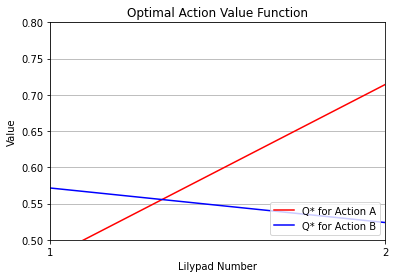

{1: {'B': 1.0}, 2: {'A': 1.0}, 3: {'A': 1.0}, 4: {'A': 1.0}, 5: {'A': 1.0}, 0: {'A': 1.0}, 6: {'A': 1.0}}
{1: 0.6595744680851066, 2: 0.7021276595744683, 3: 0.7234042553191491, 4: 0.7446808510638301, 5: 0.7872340425531916, 0: 0.0, 6: 0.0}


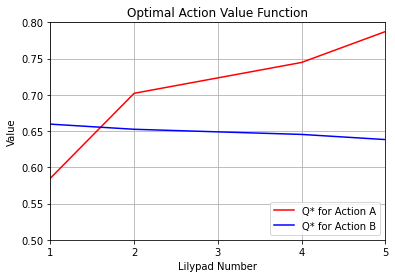

{1: {'B': 1.0}, 2: {'A': 1.0}, 3: {'A': 1.0}, 4: {'A': 1.0}, 5: {'A': 1.0}, 6: {'A': 1.0}, 7: {'A': 1.0}, 8: {'A': 1.0}, 0: {'A': 1.0}, 9: {'A': 1.0}}
{1: 0.675675675675677, 2: 0.7052364864864882, 3: 0.7136824324324343, 4: 0.7179054054054073, 5: 0.7212837837837855, 6: 0.7255067567567586, 7: 0.7339527027027046, 8: 0.7635135135135153, 0: 0.0, 9: 0.0}


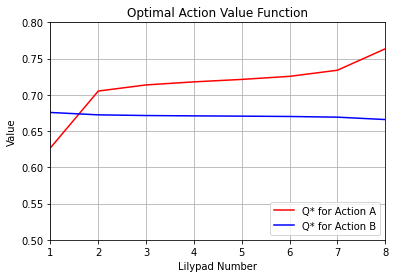

In [14]:
def graph_q_func(a: Sequence[Tuple[float, float]]) -> NoReturn:
    import matplotlib.pyplot as plt
    x_vals = range(1, len(a) + 1)
    plt.plot(x_vals, [x for x, _ in a], "r", label="Q* for Action A")
    plt.plot(x_vals, [y for _, y in a], "b", label="Q* for Action B")
    plt.xlabel("Lilypad Number")
    plt.ylabel("Value")
    plt.title("Optimal Action Value Function")
    plt.xlim(xmin=x_vals[0], xmax=x_vals[-1])
    plt.ylim(ymin=0.5, ymax=0.8)
    plt.xticks(x_vals)
    plt.grid(True)
    plt.legend(loc='lower right')
    plt.show()


if __name__ == '__main__':
    pads: int = 3
    mdp: MDPRefined = get_lily_pads_mdp(pads)
    pol = mdp.get_optimal_policy(1e-8)
    print(pol.policy_data)
    print(mdp.get_value_func_dict(pol))
    qv = mdp.get_act_value_func_dict(pol)
    graph_q_func(get_sorted_q_val(qv))
    
if __name__ == '__main__':
    pads: int = 6
    mdp: MDPRefined = get_lily_pads_mdp(pads)
    pol = mdp.get_optimal_policy(1e-8)
    print(pol.policy_data)
    print(mdp.get_value_func_dict(pol))
    qv = mdp.get_act_value_func_dict(pol)
    graph_q_func(get_sorted_q_val(qv))

if __name__ == '__main__':
    pads: int =9
    mdp: MDPRefined = get_lily_pads_mdp(pads)
    pol = mdp.get_optimal_policy(1e-8)
    print(pol.policy_data)
    print(mdp.get_value_func_dict(pol))
    qv = mdp.get_act_value_func_dict(pol)
    graph_q_func(get_sorted_q_val(qv))

The pattern we observe for the Optimal Policy as we vary n is that for i = 1, the Optimal Action is Croak B and for $2\leq i \leq n−1$, the optimal action is Croak A.

# Question 4